# 1-) Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
df = data.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [178]:
df.describe([0.80,0.85,0.90,0.95,0.99]).T

,count,mean,std,min,50%,80%,85%,90%,95%,99%,max
age,1338.000,39.207,14.050,18.000,39.000,54.000,56.000,59.000,62.000,64.000,64.000
bmi,1338.000,30.663,6.098,15.960,30.400,35.860,37.050,38.619,41.106,46.408,53.130
children,1338.000,1.095,1.205,0.000,1.000,2.000,2.000,3.000,3.000,5.000,5.000
charges,1338.000,13270.422,12110.011,1121.874,9382.033,20260.626,24990.167,34831.720,41181.828,48537.481,63770.428


I saw that there might be some outliers in charges column, because there is huge difference between 99% and max

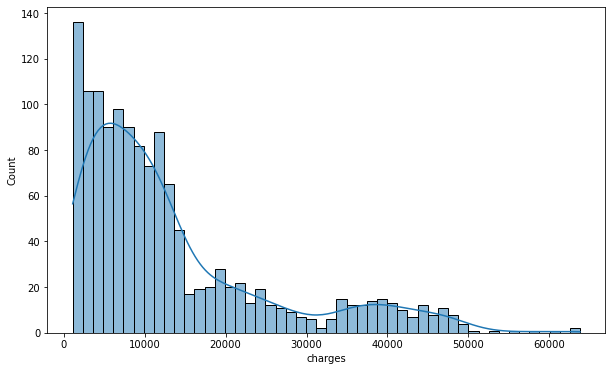

In [179]:
sns.histplot(df.charges, bins = 50, kde=True);

charges is right skewed distributed and there might be outliers.

<AxesSubplot:xlabel='charges'>

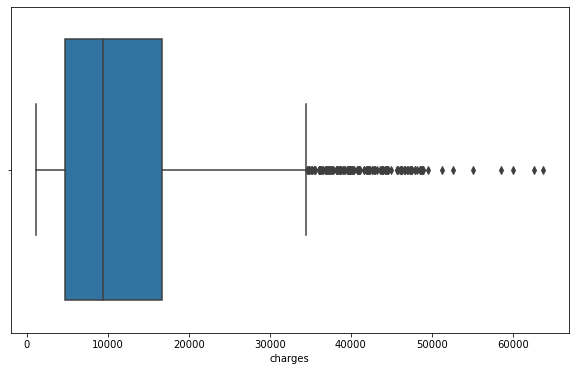

In [180]:
sns.boxplot(df.charges)

This graph also says charges column is right skewed distributed and might have outliers

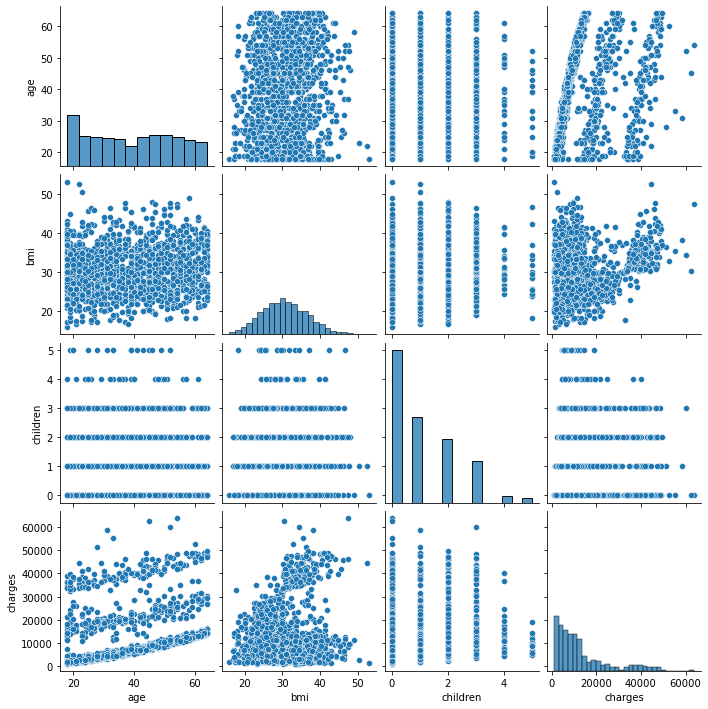

In [6]:
sns.pairplot(df);

We can see that age and charges might be positively correlated but not too much. charges and bmi might be also positively correlated but slightly correlated. 

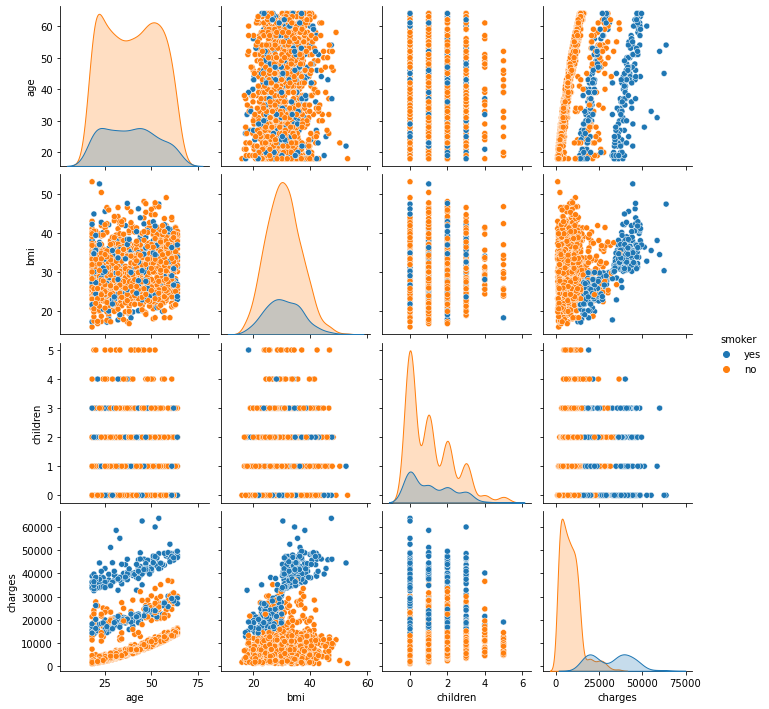

In [7]:
sns.pairplot(df, hue='smoker');

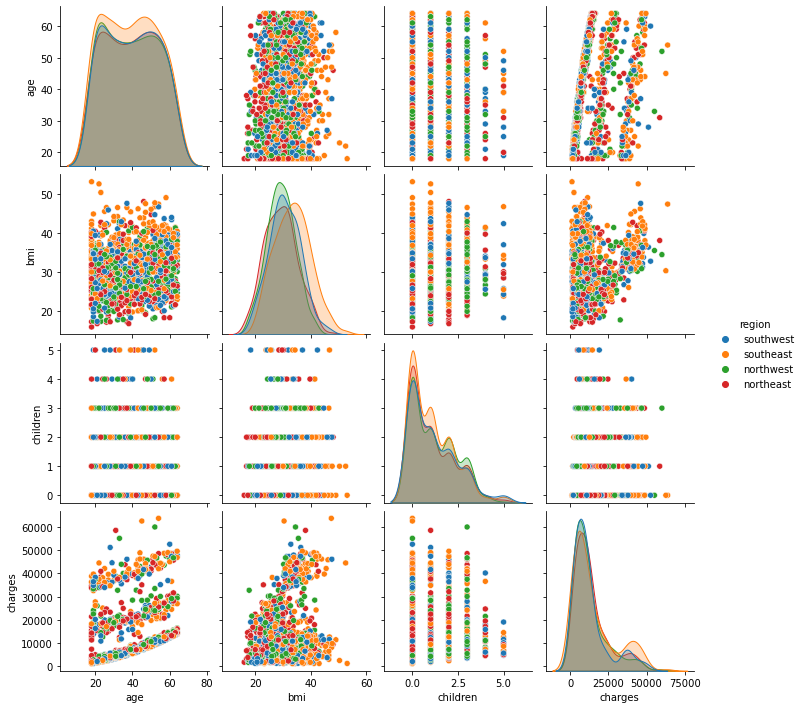

In [8]:
sns.pairplot(df, hue='region');

In [181]:
df_numeric = df.select_dtypes(include ="number")
df_numeric.head()

,age,bmi,children,charges
0,19,27.900,0,16884.924
1,18,33.770,1,1725.552
2,28,33.000,3,4449.462
3,33,22.705,0,21984.471
4,32,28.880,0,3866.855


<AxesSubplot:>

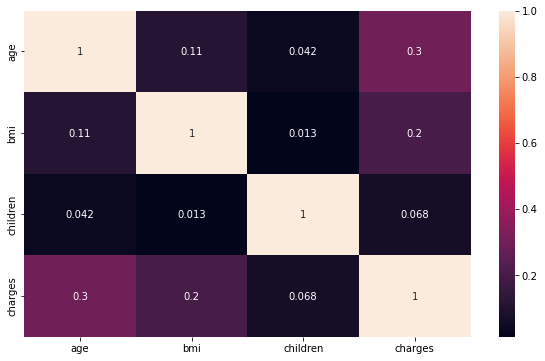

In [182]:
# lets check the correlations

sns.heatmap(df_numeric.corr(), annot=True)

all features have positive but small correlations with the target column (charges)

In [183]:
corr_by_charges = df.corr()["charges"].sort_values()[:-1]
corr_by_charges

children   0.068
bmi        0.198
age        0.299
Name: charges, dtype: float64

# 2-) Exploratory Data Analysis

### Examine the distribution of Bmi (Body Mass Index)

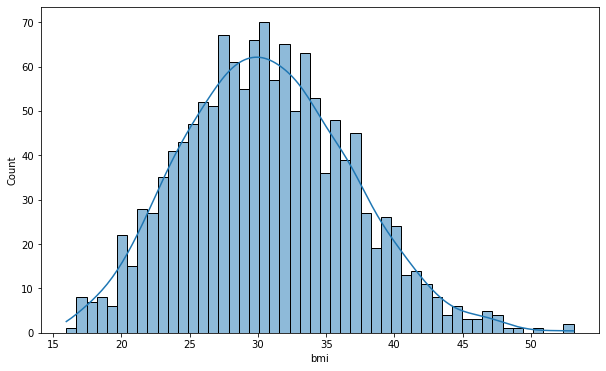

In [184]:
sns.histplot(df.bmi, bins = 50, kde=True);

it's mean is 30.400 and it looks like a normal distribution but I think it is a slightly right skewed distribution.

### Examine the relationship between "smoker" and "charges"

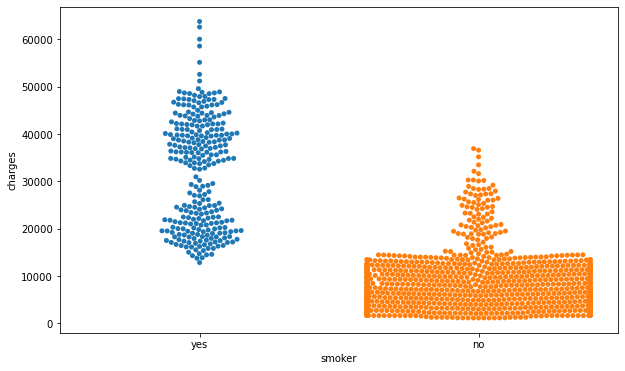

In [185]:
sns.swarmplot(data = df, x = 'smoker', y = 'charges');

it is obvious that smoking is affecting the charges directly. People who are not smoking pays around 0-30K, especially 0-10K. On the other hand, people who are smoking pay around 15K-50K.

### Examine the relationship between “smoker” and “region”.

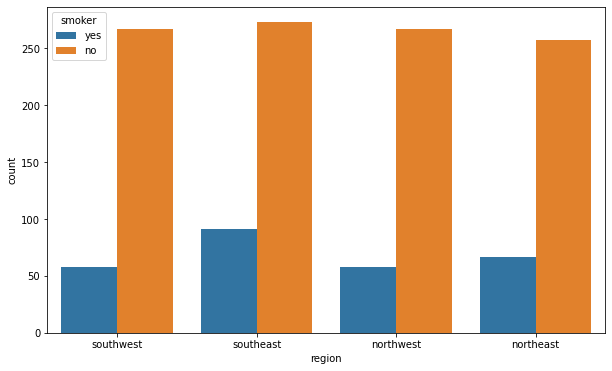

In [186]:
sns.countplot(df['region'], hue=df['smoker']);

It is understood that there is no relation between region and smoking. There are slightly more smokers in southeast region.

### Examine the relationship between “bmi” and “sex”.

<AxesSubplot:xlabel='sex', ylabel='bmi'>

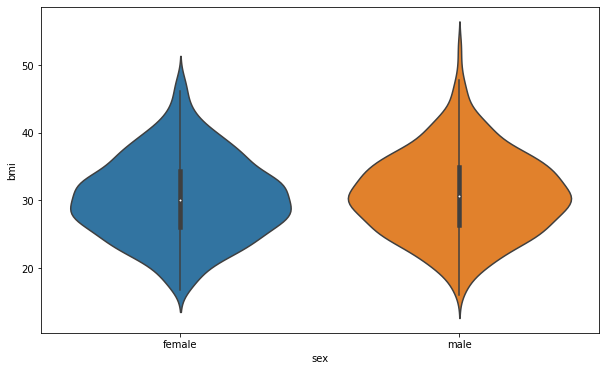

In [187]:
sns.violinplot(x='sex', y="bmi",data=df)

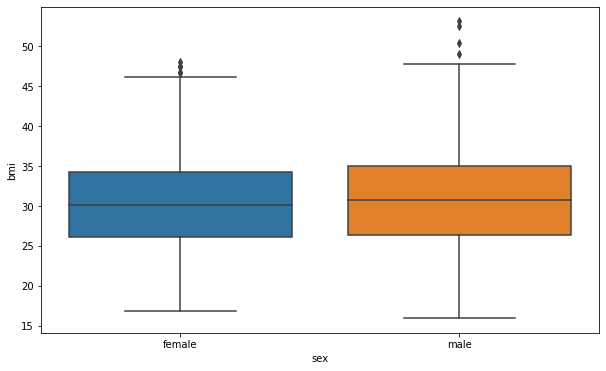

In [188]:
sns.boxplot(x='sex', y='bmi', data=df);

sex is not a main specifier for bmi according to this data set. Medians of bmi for both males and females are almost same. There are few more outlier for male data.

### Find the "region" with the most "children".

In [189]:
df.groupby(['region'])['children'].sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

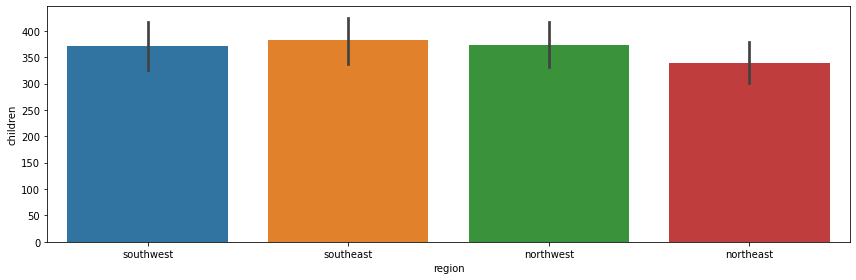

In [190]:
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x="region", y="children", data=df, estimator=np.sum)
plt.tight_layout()

### Examine the relationship between “age” and “bmi”.

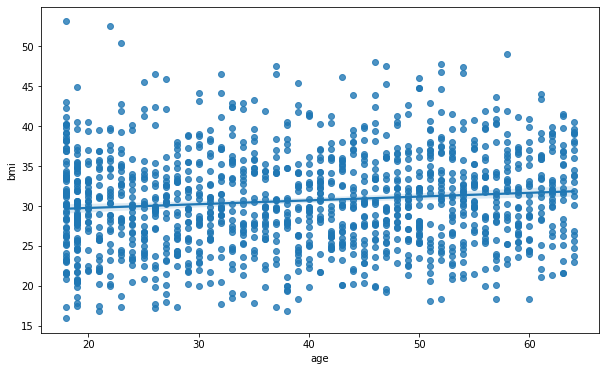

In [191]:
sns.regplot(x='age', y='bmi', data=df);

I think there is slightly positive correlation between age&bmi according to this data set.

### Examine the relationship between "bmi" and "children"

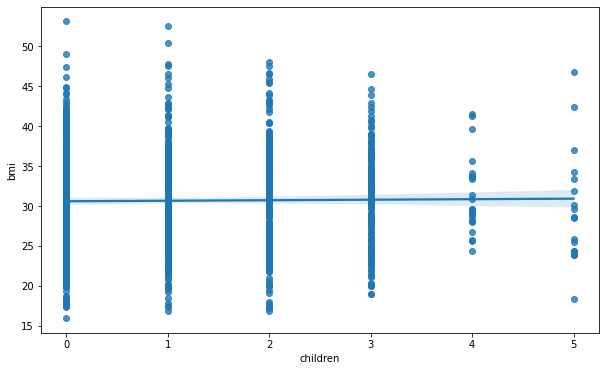

In [192]:
sns.regplot(x='children', y='bmi', data=df);

According to this graph, I can say that there is a slightly positive correlation between bmi&children

### Is there an outlier in the "bmi" variable?

In [193]:
fig = px.histogram(df, x='bmi')
fig.show();

In [194]:
fig = px.box(df, y='bmi')

fig.show()

### Examine the relationship between “bmi” and “charges”.

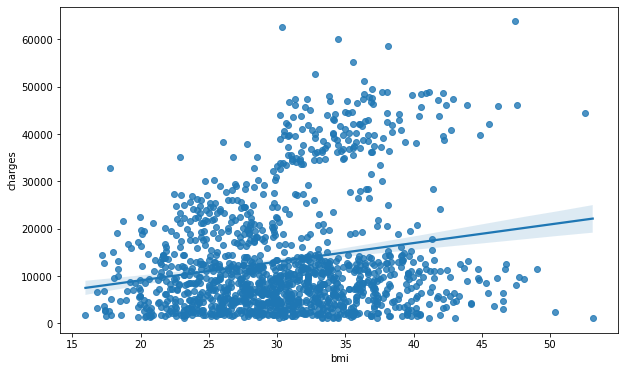

In [195]:
sns.regplot(x='bmi', y='charges', data=df);

According to this graph, I can say that there is a slightly positive correlation between bmi&charges

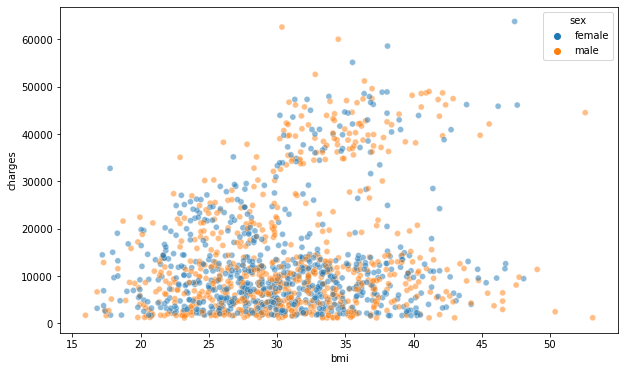

In [196]:
sns.scatterplot(x='bmi', y='charges', hue='sex', data=df, alpha=0.5);

I can say that especially after 30 bmi score, charges are going up for both sexes.

### Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

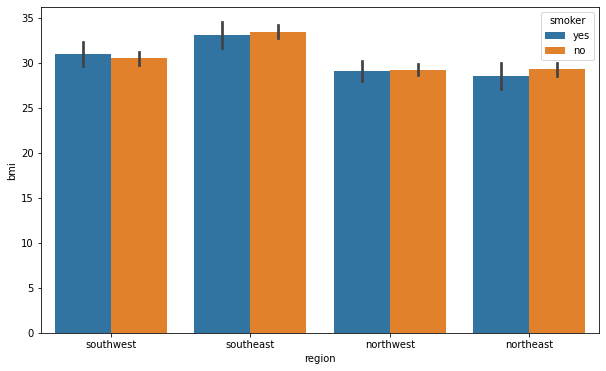

In [197]:
sns.barplot(df['region'], df['bmi'], hue=df['smoker']);

I think there is no relation between region & bmi & smoker

# 3-) Data Preprocessing

In [198]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [199]:
df=pd.get_dummies(df, drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.924,0,1,0,0,1
1,18,33.770,1,1725.552,1,0,0,1,0
2,28,33.000,3,4449.462,1,0,0,1,0
3,33,22.705,0,21984.471,1,0,1,0,0
4,32,28.880,0,3866.855,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.548,1,0,1,0,0
1334,18,31.920,0,2205.981,0,0,0,0,0
1335,18,36.850,0,1629.833,0,0,0,1,0
1336,21,25.800,0,2007.945,0,0,0,0,1


In [200]:
X=df.drop("charges", axis=1)
y=df.charges

In [201]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (1070, 8)
Train target shape   :  (1070,)
Test features shape  :  (268, 8)
Test target shape    :  (268,)


# 4-) Model Selection

In [202]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [203]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

### Linear Regression

In [204]:
from sklearn.linear_model import LinearRegression
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lm = LinearRegression()
lm.fit(X_train,y_train)

<IPython.core.display.Javascript object>

LinearRegression()

In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [206]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)
pd.options.display.float_format = '{:.3f}'.format
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.743,0.778
mae,4283.144,3920.317
mse,37266065.520,33680468.382
rmse,6104.594,5803.488


we observe that the scores in the train and test sets are close to each other. 
But these are one-time scores. What do we do now? We look at these scores and compare them. Cross validation only needs us for this comparison. It does not have a contribution to the model or the ability to make a change to the model.

### Cross Validate

In [207]:
from sklearn.model_selection import cross_validate, cross_val_score

In [208]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [209]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.000,0.000,0.681,-4332.726,-36728934.577,-6060.440
1,0.000,0.000,0.738,-4195.483,-34104307.076,-5839.889
2,0.008,0.000,0.723,-4200.332,-35941467.594,-5995.120
3,0.000,0.000,0.632,-4268.884,-41154291.146,-6415.161
4,0.008,0.000,0.739,-4549.047,-42405348.762,-6511.939
5,0.000,0.000,0.785,-3782.476,-31090520.562,-5575.887
6,0.008,0.000,0.710,-4924.924,-45362239.418,-6735.150
7,0.000,0.000,0.793,-4514.117,-37275375.006,-6105.356
8,0.000,0.000,0.752,-4217.970,-39597568.658,-6292.660
9,0.008,0.000,0.763,-4214.672,-36216052.536,-6017.977


In [210]:
pd.DataFrame(scores).iloc[:, 2:].mean()  # skorlarım 2. indeksten itibaren başladığı için

test_r2                                    0.732
test_neg_mean_absolute_error           -4320.063
test_neg_mean_squared_error        -37987610.533
test_neg_root_mean_squared_error       -6154.958
dtype: float64

In [211]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.778109660422383
MAE 		: 3920.3167916738407
MSE 		: 33680468.38188876
RMSE 		: 5803.4876050430885


In [212]:
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Since this imbalance of linear regression is known, it is always recommended to model with Ridge or Lasso in the articles on this subject.

In addition, some models of some brands may have extreme features (e.g. very high engine volume) and their data count is also small. this disrupts the linear regression model. And we're using Ridge and Lasso to solve this problem.

### Ridge Regression

In [213]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # We applied fit by scaled my train data.
X_test_scaled = scaler.transform(X_test)   # We've scaled my test data.

<IPython.core.display.Javascript object>

the scores you get between the standard scale and the minmaxscaler are different. The "yes" or "none" method that I use in this data. discount has/does not exist, 4 doors have/do not exist, air conditioning is/does not exist. If I do minmax, my dummies will remain 0 and 1. however, if I use a standard scale, my scores of 1, such as 1.29, and my scos with 0, as shown below, will produce incorrect values such as -0.64. so minmaxscaler (consisting of 1 and 0) is more suitable for this datam.

In [214]:
from sklearn.linear_model import Ridge, RidgeCV

In [215]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.743,0.778
mae,4276.953,3913.047
mse,37275378.414,33733168.544
rmse,6105.357,5808.026


### Finding best alpha for Ridge

In [216]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [217]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring='neg_root_mean_squared_error')

In [218]:
ridge_cv_model.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+0...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02]),
        cv=10, scoring='neg_root_mean_squared_error')

In [219]:
ridge_cv_model.alpha_

0.01

In [220]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.743,0.778
mae,4283.068,3920.235
mse,37266066.495,33680910.540
rmse,6104.594,5803.526


In [221]:
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

I don't cross-validation Ridge and Lasso either because that's what they do in themselves.

### Lasso

In [222]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # We applied fit by scaled my train data.
X_test_scaled = scaler.transform(X_test)   # We've scaled my test data.

<IPython.core.display.Javascript object>

In [223]:
from sklearn.linear_model import Lasso, LassoCV

In [224]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
y_train_pred = lasso_model.predict(X_train_scaled)
y_pred = lasso_model.predict(X_test_scaled)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.743,0.778
mae,4281.863,3918.870
mse,37266169.925,33677528.375
rmse,6104.602,5803.234


### Finding best alpha for Lasso

In [225]:
lasso_cv_model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 100000, n_jobs =-1).fit(X_train_scaled, y_train)

In [226]:
lasso_cv_model.alpha_

9.1

In [46]:
y_train_pred = lasso_cv_model.predict(X_train_scaled)
y_pred = lasso_cv_model.predict(X_test_scaled)

In [47]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.743,0.778
mae,4272.695,3907.598
mse,37274666.265,33659876.710
rmse,6105.298,5801.713


In [48]:
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Based on lasso's results, I can select beautifully scored features and re-create a model with them. I mean, I can make feature selection, but I can't do that with Ridge. 

In Ridge, the features can be separated by comparison and separated as important-insignificant, while in Lasso, the features can be selection. 

# SVM Regression

In [49]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

<IPython.core.display.Javascript object>

In [50]:
from sklearn.svm import SVR, LinearSVR

Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

# With Default Parameters

In [51]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)
y_train_pred = svr_model.predict(X_train_scaled)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,-0.101,-0.051
mae,8324.327,8340.252
mse,159634967.282,159544835.634
rmse,12634.673,12631.106


# Cross Validate

In [52]:
model = SVR()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2',
                                                                   'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error',
                                                                   'neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.051,0.019,-0.089,-7333.355,-125523202.087,-11203.714
2,0.047,0.000,-0.116,-7905.256,-145327185.277,-12055.173
3,0.047,0.016,-0.105,-7829.726,-143071051.073,-11961.231
4,0.031,0.016,-0.033,-7584.018,-115456615.190,-10745.074
5,0.052,0.010,-0.139,-8919.331,-185023137.276,-13602.321
6,0.047,0.000,-0.049,-7840.149,-151423068.790,-12305.408
7,0.052,0.013,-0.132,-9142.361,-177028280.724,-13305.198
8,0.048,0.011,-0.139,-9670.161,-205092326.576,-14321.045
9,0.047,0.011,-0.080,-8173.353,-172122767.016,-13119.557
10,0.048,0.010,-0.160,-8997.301,-177479229.831,-13322.133


In [53]:
df_scores.mean()[2:]

test_r2                                    -0.104
test_neg_mean_absolute_error            -8339.501
test_neg_mean_squared_error        -159754686.384
test_neg_root_mean_squared_error       -12594.085
dtype: float64

# With Best Parameters (GridsearchCV)

In [54]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [55]:
from sklearn.model_selection import GridSearchCV
model = SVR()
svr_grid_model = GridSearchCV(model, param_grid=param_grid)
svr_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [56]:
svr_grid_model.best_params_

{'C': 1, 'degree': 4, 'epsilon': 0, 'gamma': 'scale', 'kernel': 'poly'}

In [57]:
y_train_pred = svr_grid_model.predict(X_train_scaled)
y_pred = svr_grid_model.predict(X_test_scaled)

In [58]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.045,0.077
mae,7815.273,7863.889
mse,138529016.662,140104303.116
rmse,11769.835,11836.566


In [59]:
svrm_R2 = r2_score(y_test, y_pred)
svrm_mae = mean_absolute_error(y_test, y_pred)
svrm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [61]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
y_train_pred = DT_model.predict(X_train)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,1.000,0.732
mae,0.000,3064.490
mse,0.000,40718321.886
rmse,0.000,6381.091


# Cross Validate

In [62]:
model = DecisionTreeRegressor()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =5)
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.008,0.008,0.631,-3150.831,-45288650.889,-6729.684
1,0.000,0.008,0.575,-3559.696,-51595880.477,-7183.027
2,0.008,0.000,0.739,-2795.083,-40303545.562,-6348.507
3,0.008,0.000,0.623,-4179.961,-63469256.702,-7966.759
4,0.008,0.000,0.656,-3592.844,-53861035.328,-7339.008


In [63]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.645
test_neg_mean_absolute_error           -3455.683
test_neg_mean_squared_error        -50903673.791
test_neg_root_mean_squared_error       -7113.397
dtype: float64

In [64]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,1.000,0.732
mae,0.000,3064.490
mse,0.000,40718321.886
rmse,0.000,6381.091


# GridSearch

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
model = DecisionTreeRegressor(random_state=101)

In [67]:
param_grid = {"splitter":["best", "random"],
            "max_depth": [None, 4, 5, 6, 7,8,9,10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
             "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [68]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [69]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [70]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=7, random_state=101)

In [71]:
grid_model.best_params_

{'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [72]:
y_train_pred = grid_model.predict(X_train)

In [73]:
y_pred = grid_model.predict(X_test)

In [74]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.869,0.888
mae,2484.950,2426.817
mse,19057595.970,17023194.167
rmse,4365.501,4125.917


In [75]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(max_depth = 5, min_samples_split= 2, min_samples_leaf=7, splitter='best')
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.000,0.008,0.859,-2417.150,-16290932.870,-4036.203
1,0.000,0.008,0.829,-2657.170,-22274896.507,-4719.629
2,0.008,0.000,0.862,-2430.193,-17830434.968,-4222.610
3,0.008,0.000,0.709,-3381.573,-32468372.127,-5698.103
4,0.008,0.000,0.838,-3050.843,-26249148.713,-5123.392
5,0.008,0.000,0.873,-2475.041,-18284745.193,-4276.067
6,0.008,0.000,0.836,-2941.370,-25646224.882,-5064.210
7,0.008,0.000,0.896,-2396.368,-18717325.189,-4326.352
8,0.000,0.008,0.856,-2556.064,-22976691.695,-4793.401
9,0.000,0.008,0.835,-3003.701,-25238704.590,-5023.814


In [76]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.839
test_neg_mean_absolute_error           -2730.947
test_neg_mean_squared_error        -22597747.673
test_neg_root_mean_squared_error       -4728.378
dtype: float64

In [77]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.869,0.888
mae,2484.950,2426.817
mse,19057595.970,17023194.167
rmse,4365.501,4125.917


In [78]:
dtm_R2 = r2_score(y_test, y_pred)
dtm_mae = mean_absolute_error(y_test, y_pred)
dtm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.975,0.858
mae,1061.421,2718.645
mse,3563409.413,21507694.998
rmse,1887.700,4637.639


# Cross Validate

In [81]:
model = RandomForestRegressor()

scores = cross_validate(model, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',
                                                          'neg_root_mean_squared_error'], cv =5)
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.213,0.000,0.816,-2838.701,-22587261.442,-4752.606
1,0.219,0.016,0.771,-2995.147,-27740224.648,-5266.899
2,0.212,0.000,0.834,-2872.702,-25648265.847,-5064.412
3,0.219,0.016,0.839,-2937.663,-27052821.959,-5201.233
4,0.175,0.016,0.833,-2917.897,-26072255.311,-5106.100


In [82]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.819
test_neg_mean_absolute_error           -2912.422
test_neg_mean_squared_error        -25820165.841
test_neg_root_mean_squared_error       -5078.250
dtype: float64

In [83]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.975,0.858
mae,1061.421,2718.645
mse,3563409.413,21507694.998
rmse,1887.700,4637.639


# Grid Search

In [84]:
param_grid = {"n_estimators":[100, 301, 500],
             "max_depth":[None, 3, 5, 7],
             "max_features":["auto", 3, 5],
             "min_samples_split":[2, 4, 6]}

In [85]:
model = RandomForestRegressor()
rf_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='neg_root_mean_squared_error',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [86]:
rf_grid_model.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_split': 4,
 'n_estimators': 301}

In [87]:
y_train_pred = rf_grid_model.predict(X_train)

In [88]:
y_pred = rf_grid_model.predict(X_test)

In [89]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.877,0.892
mae,2372.903,2401.242
mse,17784081.977,16404501.215
rmse,4217.118,4050.247


In [90]:
from sklearn.model_selection import cross_validate, cross_val_score
model = RandomForestRegressor(max_depth = 5, min_samples_split= 4, min_samples_leaf=5, n_estimators = 301)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.709,0.024,0.858,-2355.524,-16330834.252,-4041.143
1,0.576,0.024,0.840,-2495.827,-20902813.024,-4571.959
2,0.444,0.024,0.865,-2377.488,-17460705.348,-4178.601
3,0.427,0.031,0.725,-3206.098,-30737008.385,-5544.097
4,0.418,0.016,0.841,-2870.338,-25813481.291,-5080.697
5,0.434,0.024,0.877,-2366.459,-17761082.327,-4214.390
6,0.437,0.016,0.836,-2887.380,-25684202.458,-5067.958
7,0.418,0.016,0.896,-2349.777,-18674591.533,-4321.411
8,0.498,0.016,0.870,-2349.614,-20676027.943,-4547.090
9,0.483,0.032,0.851,-2812.095,-22747970.737,-4769.483


In [91]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.846
test_neg_mean_absolute_error           -2607.060
test_neg_mean_squared_error        -21678871.730
test_neg_root_mean_squared_error       -4633.683
dtype: float64

In [92]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.877,0.892
mae,2372.903,2401.242
mse,17784081.977,16404501.215
rmse,4217.118,4050.247


In [93]:
rfm_R2 = r2_score(y_test, y_pred)
rfm_mae = mean_absolute_error(y_test, y_pred)
rfm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### Visually Compare Models Performance In a Graph

In [94]:
scores = {"linear_m": {"r2_score": lm_R2, 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "svm_m": {"r2_score": svrm_R2,
 "mae": svrm_mae,
 "rmse": svrm_rmse},
         
  "dtm_m": {"r2_score": dtm_R2,
  "mae": dtm_mae,
  "rmse": dtm_rmse},
  
  "rfm_m": {"r2_score": rfm_R2,
  "mae": rfm_mae,
  "rmse": rfm_rmse}} 
scores = pd.DataFrame(scores).T
scores


,r2_score,mae,rmse
linear_m,0.778,3920.317,5803.488
ridge_m,0.778,3920.235,5803.526
lasso_m,0.778,3907.598,5801.713
svm_m,0.077,7863.889,11836.566
dtm_m,0.888,2426.817,4125.917
rfm_m,0.892,2401.242,4050.247


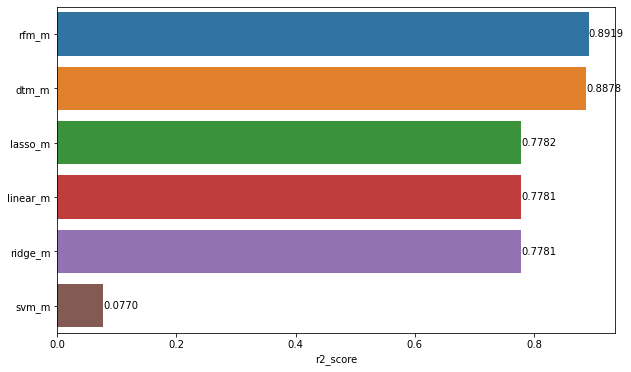

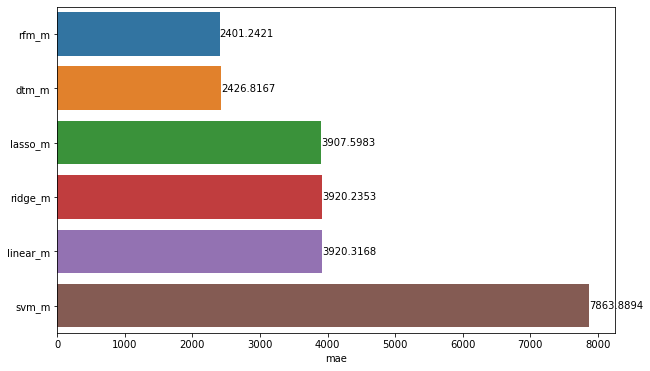

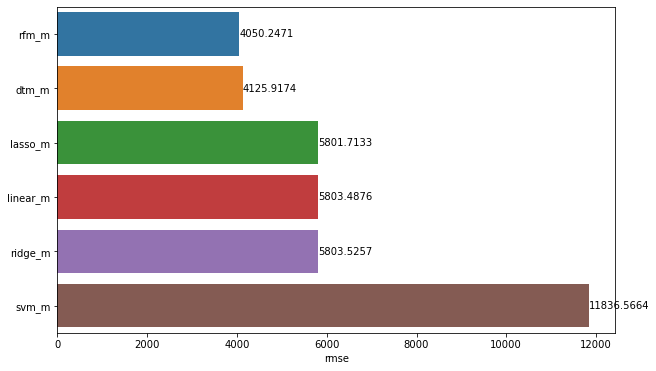

In [95]:
metrics = scores.columns
for i,j in enumerate(metrics):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

# Prediction new observation

Now that I'm sure of my model to use and I've decided, I can now train my model with ALL DATA!!!

In [96]:
columns_name = X.columns

In [97]:
final_scaler = MinMaxScaler()

<IPython.core.display.Javascript object>

In [98]:
final_scaler.fit(X)

# We scale all the data before we go on to train the whole model.

MinMaxScaler()

In [99]:
X_scaled = final_scaler.transform(X)

In [100]:
param_grid = {"n_estimators":[100, 301, 500],
             "max_depth":[None, 3, 5, 7],
             "max_features":["auto", 3, 5],
             "min_samples_split":[2, 4, 6]}

In [101]:
model = RandomForestRegressor()
final_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='neg_root_mean_squared_error',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [102]:
final_model.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_split': 6,
 'n_estimators': 100}

In [103]:
final_model.fit(X_scaled,y) # I train with all my data

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7],
                         'max_features': ['auto', 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 301, 500]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [104]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [105]:
my_dict = {
    "age": 19,
    "bmi": 27.900,
    "children": 0,
    "sex": "female",
    "smoker": 'yes',
    "region": "southwest"
}

# Here we gave new values.

#I need to put it in the same structure as the data I put into training so I can put the feature I've been given into the prediction. so I'm going to get_dummies this data and adjust the order of the features.

#Also, if you use scaled data when you train, you need to scale the data first when you predict it. Otherwise, you'll get an incorrect value because the data scale I'm guessing isn't.

In [106]:
my_dict = pd.DataFrame([my_dict])
my_dict

,age,bmi,children,sex,smoker,region
0,19,27.900,0,female,yes,southwest


After converting my_dict to dataframe.. What am I going to turn him around? What did I do the training with? I did it with an X. therefore, the structure I am trying to translate will be the same as the structure of X (feature order). So I'm going to use X's column names. 

In [107]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [108]:
my_dict = pd.get_dummies(my_dict)
my_dict

,age,bmi,children,sex_female,smoker_yes,region_southwest
0,19,27.900,0,1,1,1


In [109]:
# columns_name = X.columns  # That's how we described it up there.

my_dict = my_dict.reindex(columns=columns_name, fill_value=0)
my_dict

 # I'm editing my my_dict with the following sorting

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1


I've numericized get_dummies and my_dict's categorical feature. But what's missing? Other dummies are missing at the moment. (Missing dummies from the feature I saw when I looked at X.head() and X)
I will use the reindex function to address this deficiency. This reindex organizes both indexes and columns (edits whichever you type) 

If I enter "columns" as a parameter in reindex and I want the dataframe to take the column structure opposite the equal (here I assigned columns_name of it here because I want the column structure of X). As a result, my "my_dict" data now has the same column as X, so my new observation (i.e. my_dict) has come into the same structure as the data I put into training. 

I can put that in the th place now. But here's another very important point:
If I've trained the data I've trained by scaled it up, I'm going to have to scale and predict the data I'm going to make, otherwise my predictions are completely wrong.

In [110]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.924,0,1,0,0,1
1,18,33.770,1,1725.552,1,0,0,1,0
2,28,33.000,3,4449.462,1,0,0,1,0
3,33,22.705,0,21984.471,1,0,1,0,0
4,32,28.880,0,3866.855,1,0,1,0,0


If you use scaled data when you train, you need to scale the data first. Otherwise, I'll guess I'll get an incorrect value because the data isn't scaled up. Now I'm going to do the scale conversion.  But since it's fit up there, I'm just applying a transform.

In [111]:
my_dict = final_scaler.transform(my_dict)

In [112]:
my_dict

array([[0.02173913, 0.3212268 , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        ]])

In [113]:
final_model.predict(my_dict)

array([18265.57677034])